# Loading Dependencies

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading encoded data

In [73]:
data = pd.read_csv('encoded-jojo-stands.csv', encoding='latin1')

In [74]:
data.head()

,Stand,PWR,SPD,RNG,PER,PRC,DEV
0,Anubis,8,8,2,10,2,6
1,Atum,4,6,4,8,4,4
2,Bastet,2,2,8,10,2,2
3,Cream,8,8,4,6,6,4
4,Death Thirteen,6,6,2,8,4,8


# Preprocessing

In [75]:
x = data.drop('Stand', axis=1)

In [76]:
# Creating scaler to normalize values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Clustering

In [77]:
kmeans = KMeans(n_clusters=4,random_state=42)
data['Rank'] = kmeans.fit_predict(x_scaled)

c:\Users\manpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


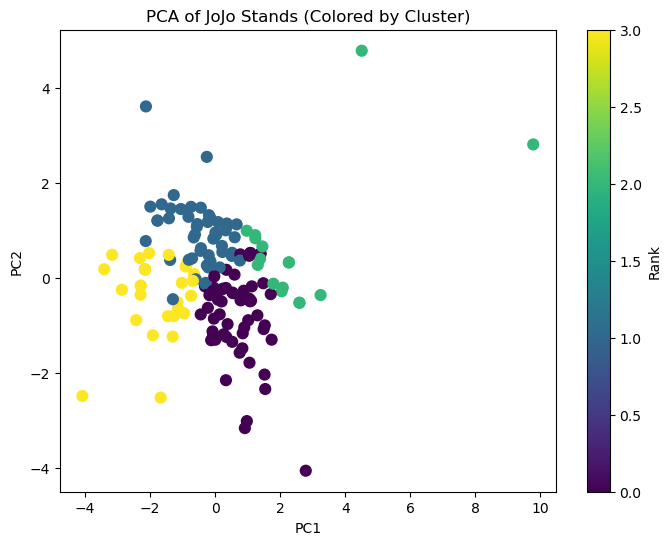

In [78]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_scaled)


plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['Rank'], cmap='viridis', s=60)
plt.title("PCA of JoJo Stands (Colored by Cluster)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Rank')
plt.show()

# Creating labeled csv

In [79]:
data.to_csv('./labeled-encoded-jojo-stands.csv', encoding='latin1')

In [80]:
data['Rank'].value_counts().reset_index()

,Rank,count
0,0,60
1,1,50
2,3,30
3,2,16


In [85]:
centroids = kmeans.cluster_centers_

centroids_original = scaler.inverse_transform(centroids)
centroid_df = pd.DataFrame(centroids_original, columns=['PWR', 'SPD', 'RNG', 'PER', 'PRC', 'DEV'])
centroid_df.index.name = 'Rank'
print(centroid_df)

           PWR        SPD       RNG        PER       PRC    DEV
Rank                                                           
0     7.666667   7.633333  5.533333   7.333333  5.133333  7.300
1     3.640000   5.440000  9.240000   9.280000  4.080000  3.640
2     9.375000  11.500000  9.375000  11.250000  8.750000  7.625
3     2.466667   3.000000  2.400000   8.400000  2.066667  3.400
